In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Check if the single-site run ERW model and the CONUS run default model have the same vegetation
hr2 = xr.open_dataset(
    '/gpfs/wolf2/cades/cli185/proj-shared/ywo/E3SM/output/20240923_conus_ICB1850CNRDCTCBC_ad_spinup_erw/run/20240923_conus_ICB1850CNRDCTCBC_ad_spinup_erw.elm.h1.0061-01-01-00000.nc'
)

In [28]:
temp = np.where((np.abs(hr2['pfts1d_lat'] - 37.25) < 1e-3) & 
                (np.abs(hr2['pfts1d_lon'] - 274.75) < 1e-3))[0]

In [29]:
hr2['GPP'].values[0, temp]

array([          nan, 4.6298195e-05,           nan,           nan,
                 nan,           nan,           nan, 4.6822188e-05,
                 nan,           nan,           nan,           nan,
                 nan, 5.4938118e-05, 7.7689394e-05, 5.6344605e-05,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
       0.0000000e+00], dtype=float32)

In [9]:
hr2['GPP']

<xarray.DataArray 'GPP' (time: 1, pft: 106804)>
[106804 values with dtype=float32]
Coordinates:
  * time     (time) object 0101-01-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     gross primary production
    units:         gC/m^2/s
    cell_methods:  time: mean

In [25]:
hr2.close()

In [31]:
hr0 = xr.open_dataset(
    '/gpfs/wolf2/cades/cli185/proj-shared/ywo/E3SM/output/20240923_conus_ICB1850CNRDCTCBC_ad_spinup_erw/run/20240923_conus_ICB1850CNRDCTCBC_ad_spinup_erw.elm.r.0061-01-01-00000.nc'
)
cols1d_lon = hr0['cols1d_lon'].copy()
cols1d_lat = hr0['cols1d_lat'].copy()
topo1d_lon = hr0['topo1d_lon'].copy()
topo1d_lat = hr0['topo1d_lat'].copy()
pft1d_lon = hr0['pfts1d_lon'].copy()
pft1d_lat = hr0['pfts1d_lat'].copy()
mask = hr0['cols1d_ityp'].copy() == 1
mask_pft = hr0['pfts1d_active'].copy() > 0
hr0.close()

/ccsopen/home/ywo/.conda/envs/myCondaEnv/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'timemgr_rst_nstep_rad_prev' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/ccsopen/home/ywo/.conda/envs/myCondaEnv/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'timemgr_rst_type' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/ccsopen/home/ywo/.conda/envs/myCondaEnv/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'timemgr_rst_step_sec' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/ccsopen/home/ywo/.conda/envs/myCondaEnv/lib/python3.11/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'timemgr_rst_start_ymd' has multiple fill values {-9999, -999999999}, decoding all valu

In [3]:
hr = xr.open_dataset(
    '/gpfs/wolf2/cades/cli185/proj-shared/ywo/E3SM/output/diff.nc'
    # '/gpfs/wolf2/cades/cli185/proj-shared/ywo/E3SM/output/20240923_conus_ICB1850CNRDCTCBC_ad_spinup/run/20240923_conus_ICB1850CNRDCTCBC_ad_spinup.elm.r.0101-01-01-00000.nc'
)

In [11]:
for var in hr.data_vars:
    if np.issubdtype(hr[var].dtype, np.number): # 'column' in hr[var].dims:
        temp = hr[var] # .where(mask)
        if np.nanmax(temp) > 0:
            print(var, np.nanmax(temp))

area 2772.4866
lat 48.75


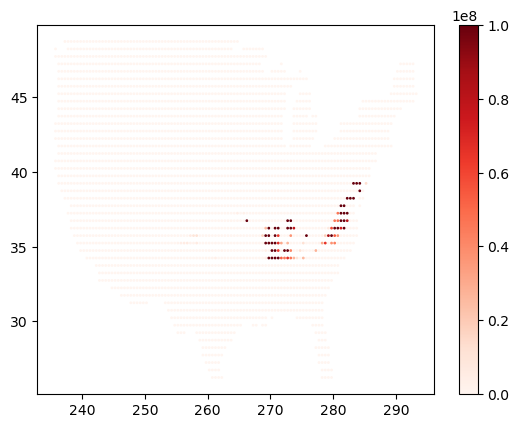

In [43]:
plt.scatter(cols1d_lon.where(mask), cols1d_lat.where(mask), c = hr['INT_SNOW'].where(mask), 
            s = 1, cmap = 'Reds')
plt.colorbar()

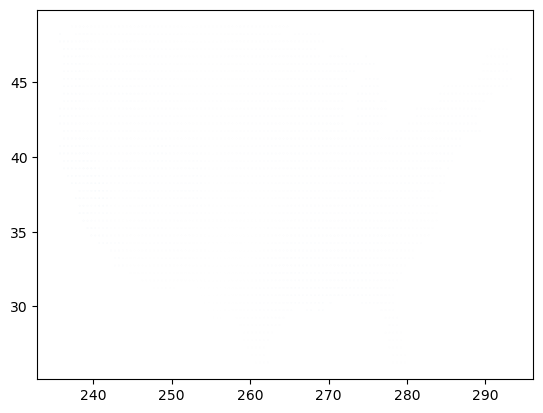

In [39]:
plt.scatter(
    topo1d_lon, topo1d_lat, hr['PREC10D_VALUE']
)

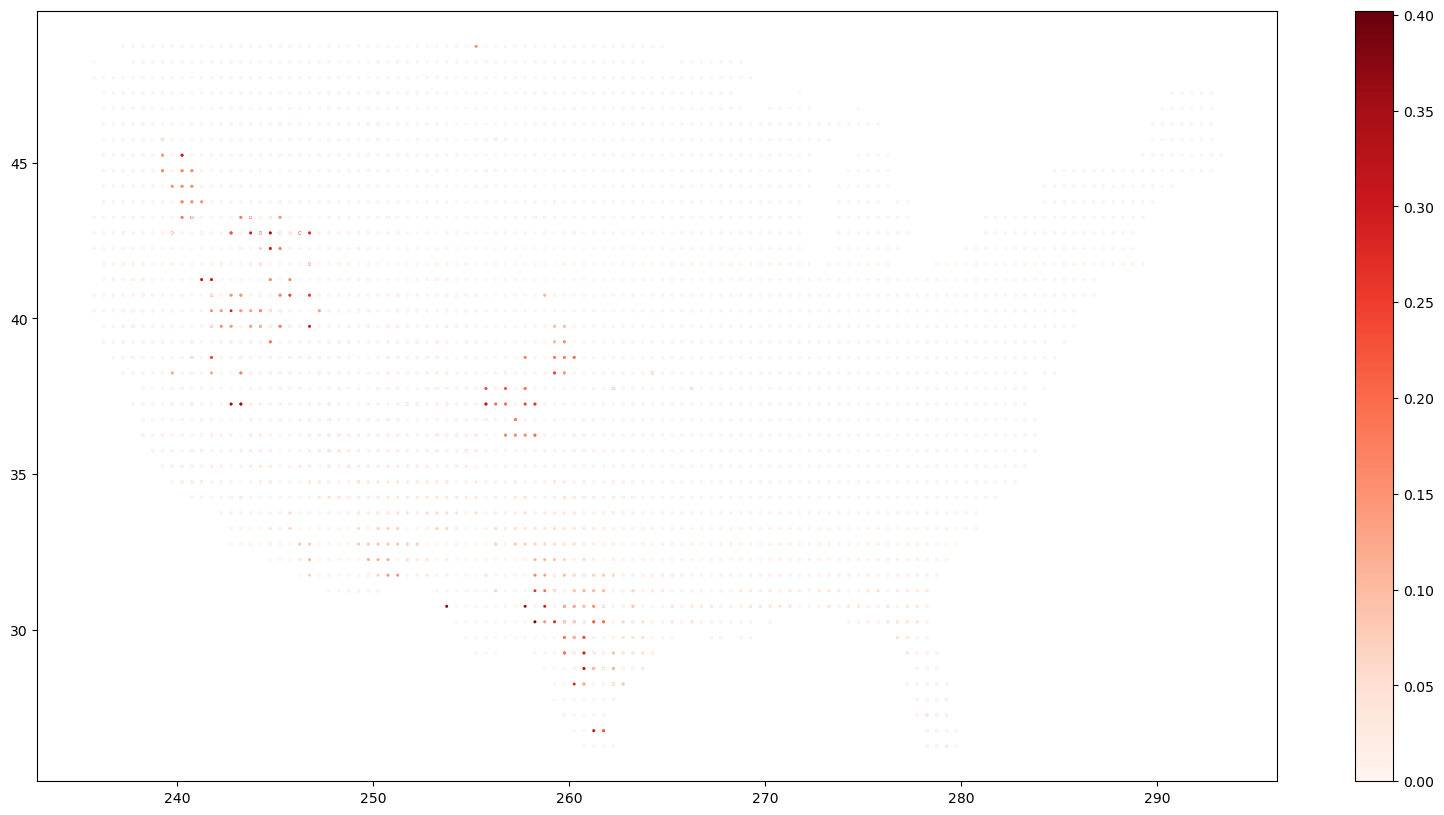

In [38]:
plt.figure(figsize = (20, 10))
plt.scatter(
    pft1d_lon.where(mask_pft), pft1d_lat.where(mask_pft), 
    c = np.abs(hr['FSUN240_VALUE'].where(mask_pft)), s = 1, cmap = 'Reds'
)
#plt.gca().set_aspect(0.5)
plt.colorbar()